In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [75]:
import seaborn as sns

In [3]:
from sklearn import svm

In [4]:
import tensorflow.compat.v2 as tf

In [5]:
import cv2

In [6]:
#recture 21
# データの並び替えと順番

ser1 = Series(range(3), index=['C', 'A', 'B'])

In [7]:
ser1

C    0
A    1
B    2
dtype: int64

In [8]:
ser1.sort_index()

A    1
B    2
C    0
dtype: int64

In [10]:
ser1

C    0
A    1
B    2
dtype: int64

In [17]:
#sort()はなくなって、sort_valuesに統一された。
ser1.sort_values

<bound method Series.sort_values of C    0
A    1
B    2
dtype: int64>

In [12]:
from numpy.random import randn

ser2 = Series(randn(10))

In [13]:
ser2

0   -0.589971
1   -0.983868
2   -0.751610
3    0.769050
4    0.091222
5    0.091094
6   -0.712103
7    0.521427
8    2.228084
9   -0.537877
dtype: float64

In [14]:
ser2.rank()
# 大きい順番にindex を返す。

0     4.0
1     1.0
2     2.0
3     9.0
4     7.0
5     6.0
6     3.0
7     8.0
8    10.0
9     5.0
dtype: float64

In [16]:
ser2.sort_values()
#sort()はなくなって、sort_valuesに統一された。

1   -0.983868
2   -0.751610
6   -0.712103
0   -0.589971
9   -0.537877
5    0.091094
4    0.091222
7    0.521427
3    0.769050
8    2.228084
dtype: float64

In [18]:
ser2.rank()

0     4.0
1     1.0
2     2.0
3     9.0
4     7.0
5     6.0
6     3.0
7     8.0
8    10.0
9     5.0
dtype: float64

In [20]:
arr = np.array([[1,2, np.nan],[np.nan, 3, 4]])

In [21]:
arr

array([[ 1.,  2., nan],
       [nan,  3.,  4.]])

In [39]:
df1 =DataFrame(arr, index=['A', 'B'], columns=['one', 'two', 'three'])

In [40]:
df1

one  two  three
A  1.0  2.0    NaN
B  NaN  3.0    4.0

In [28]:
df1.sum()
# 合計値を列ごとに出力

one      1.0
two      5.0
three    4.0
dtype: float64

In [29]:
# 行方向に出力

df1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [33]:
#最小値
df1.min()
# 最小値のインデックス


one      1.0
two      2.0
three    4.0
dtype: float64

In [34]:
df1.idxmin()

one      A
two      A
three    B
dtype: object

In [35]:
df1.idxmax()

one      A
two      B
three    B
dtype: object

In [36]:
df1

one  two  three
A  1.0  2.0    NaN
B  NaN  3.0    4.0

In [42]:
df2 = df1.copy()


In [45]:
# 列を追加
df2['four'] = [5,6]
df2

one  two  three  four
A  1.0  2.0    NaN     5
B  NaN  3.0    4.0     6

In [47]:
# 行を追加
df2.loc['C'] = [3,4,5,6]
df2

one  two  three  four
A  1.0  2.0    NaN     5
B  NaN  3.0    4.0     6
C  3.0  4.0    5.0     6

In [49]:
# 行ごとに加算
df2.cumsum()

one  two  three  four
A  1.0  2.0    NaN     5
B  NaN  5.0    4.0    11
C  4.0  9.0    9.0    17

In [50]:
# 列ごとに詳細を報告
df2.describe()

one  two     three      four
count  2.000000  3.0  2.000000  3.000000
mean   2.000000  3.0  4.500000  5.666667
std    1.414214  1.0  0.707107  0.577350
min    1.000000  2.0  4.000000  5.000000
25%    1.500000  2.5  4.250000  5.500000
50%    2.000000  3.0  4.500000  6.000000
75%    2.500000  3.5  4.750000  6.000000
max    3.000000  4.0  5.000000  6.000000

In [61]:
# 株価データのインストール
import pandas_datareader.data as pdd
import datetime

In [63]:
prices = pdd.get_data_yahoo(['CVX', 'XOM', 'BP'],
                                  start = datetime.datetime(2019,1,1),
                                  end   = datetime.datetime(2020,1,1)
                                  )['Adj Close']

In [66]:
prices.head()

Symbols            CVX        XOM         BP
Date                                        
2018-12-31   98.936569  60.260742  33.037144
2019-01-02  100.664474  61.586319  33.620872
2019-01-03   98.736496  60.640751  33.812546
2019-01-04  100.782707  62.876545  34.875450
2019-01-07  102.092270  63.203518  34.988708

In [67]:
rets = prices.pct_change()
# 前日からの変化割合を計算

In [68]:
rets.head()

Symbols          CVX       XOM        BP
Date                                    
2018-12-31       NaN       NaN       NaN
2019-01-02  0.017465  0.021997  0.017669
2019-01-03 -0.019153 -0.015354  0.005701
2019-01-04  0.020724  0.036869  0.031435
2019-01-07  0.012994  0.005200  0.003248

In [72]:
import matplotlib
%matplotlib inline
# いつもの

<AxesSubplot:xlabel='Date'>

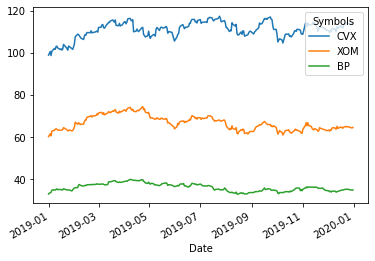

In [73]:
prices.plot()

In [74]:
# 各列間の相関係数の算出。
rets.corr()

Symbols       CVX       XOM        BP
Symbols                              
CVX      1.000000  0.754501  0.573620
XOM      0.754501  1.000000  0.667784
BP       0.573620  0.667784  1.000000

In [76]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

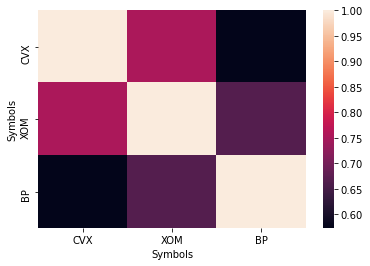

In [77]:
# 相関性を描画
sns.heatmap(rets.corr())


In [78]:
ser1 = Series(['w','w','w','w','w','y','w','w','x','w','x','w'])

In [80]:
# 重複したものを数える。
ser1.value_counts()

w    9
x    2
y    1
dtype: int64

In [82]:
# ユニークなものを数える
ser1.unique()

array(['w', 'y', 'x'], dtype=object)